### Nhận dạng khuôn mặt sử dụng PCA and SVM trên tâp dữ liệu "The face Yale"


#### import một số thư việc cài đặt thuật toán

In [86]:
import os
from PIL import Image
# import pylab as pl
import numpy as np
import random as rd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.svm import SVC

#### Format lại Database(nếu chưa format)

In [87]:
# files = os.listdir(YALE_DIR)[1:]
# print(files)
# for i, img in enumerate(files):
#     print("original name: ", img)
#     new_ext_name = "_".join(img.split(".")) + ".gif"
#     print("new name: ",  new_ext_name)
#     os.rename(os.path.join(YALE_DIR, img), os.path.join(YALE_DIR, new_ext_name))

#### Hàm hiển thị một số hình ảnh ngẫu nhiên

In [88]:
def title(y, labels):
    return [ labels[i] for i in y]
def plot_gallery(images, titles,img_size=(200,200),title="None", n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row),facecolor=(1, 1, 1))
    plt.title(title)
    
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    randomlist = rd.sample(range(len(images)), n_row*n_col)
    for idex,i in enumerate( randomlist):
        
        plt.subplot(n_row, n_col, idex + 1)
        plt.imshow(images[i].reshape(img_size), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

#### Hàm đọc database

In [89]:

# Hàm đọc data base
def readDatabases(DB_name,re_size=(150,150)):
    files = os.listdir(DB_name)
    files.sort()
    X_data =[]
    y_data_lables = []
    
    for file in files: # ignore the README.txt file at files[0]
        img = Image.open(os.path.join(DB_name, file)).resize(re_size)
        img_arr = np.array(img)
        X_data.append(img_arr.flatten())   
        # append label to eval_label set
        y_data_lables.append(file.split("_")[0])  
    labels=np.unique(y_data_lables)  
    y_data=[np.where(labels==i)[0][0] for i in y_data_lables]
    # X_data,y_data=shuffle(X_data,y_data)
    return X_data,y_data,labels

#### Đọc database yalefaces vào X và y và hiển thị một số ảnh

In [90]:
YALE_DIR="Database/yalefaces"
re_size=(200,200)
X,y,labels=readDatabases(YALE_DIR,re_size)
print("*Số đối tượng:",len(labels))
print("*số lượng ảnh:",len(y))
print("Số chiều của một ảnh:",re_size)

*Số đối tượng: 15
*số lượng ảnh: 165
Số chiều của một ảnh: (200, 200)


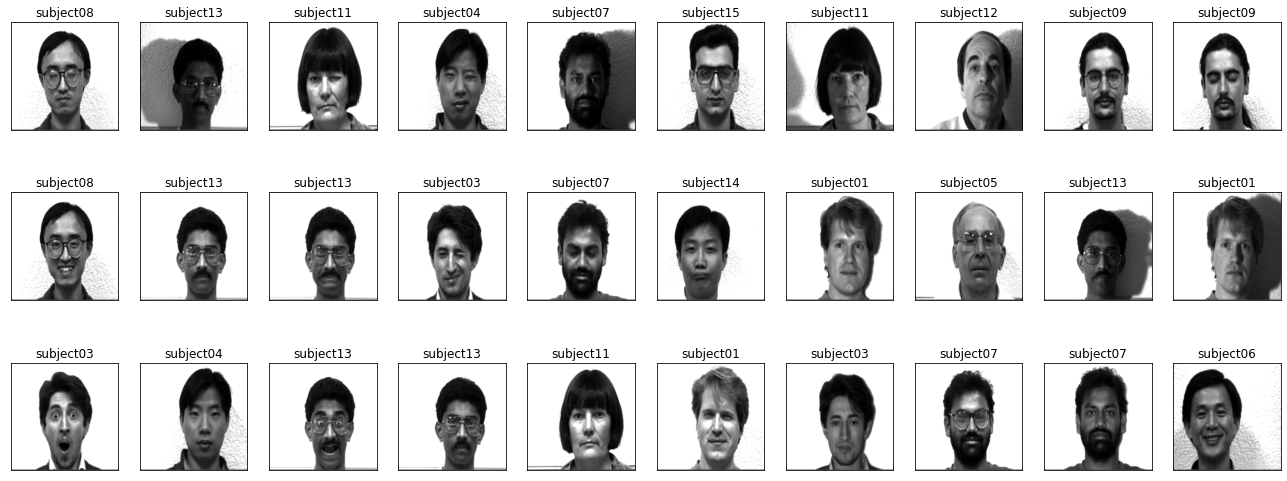

In [91]:
plot_gallery(X,title(y,labels),n_row=3,n_col=10)

#### Phân chia dữ liệu ảnh thành 2 tập train và test

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,)

In [93]:
print("*số chiều tập train:",np.array(X_train).shape)
print("*số chiều tập test:",np.array(X_test).shape)

*số chiều tập train: (132, 40000)
*số chiều tập test: (33, 40000)


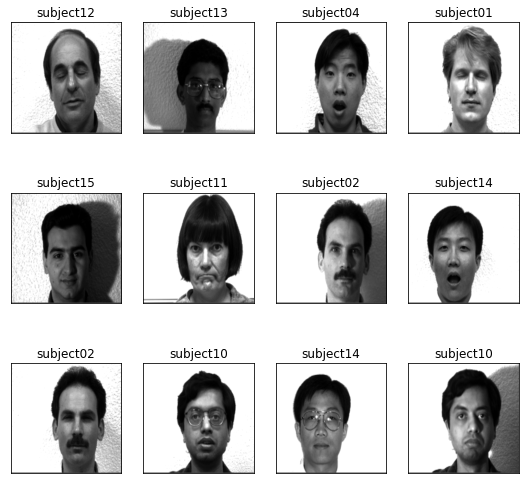

In [94]:
plot_gallery(X_train,title(y_train,labels))

#### Sử dụng thư viện PCA để giảm chiều dữ liệu ảnh

In [95]:
n_components = 100
pca = PCA(n_components=n_components,  whiten=True).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca =pca.transform(X_test)

print("*số chiều tập train qua bước PCA:",np.array(X_train_pca).shape)
print("*số chiều tập test  qua bước PCA:",np.array(X_test_pca).shape)

*số chiều tập train qua bước PCA: (132, 100)
*số chiều tập test  qua bước PCA: (33, 100)


 #### Hiển thị ảnh eigenfaces sau khi giảm chiều

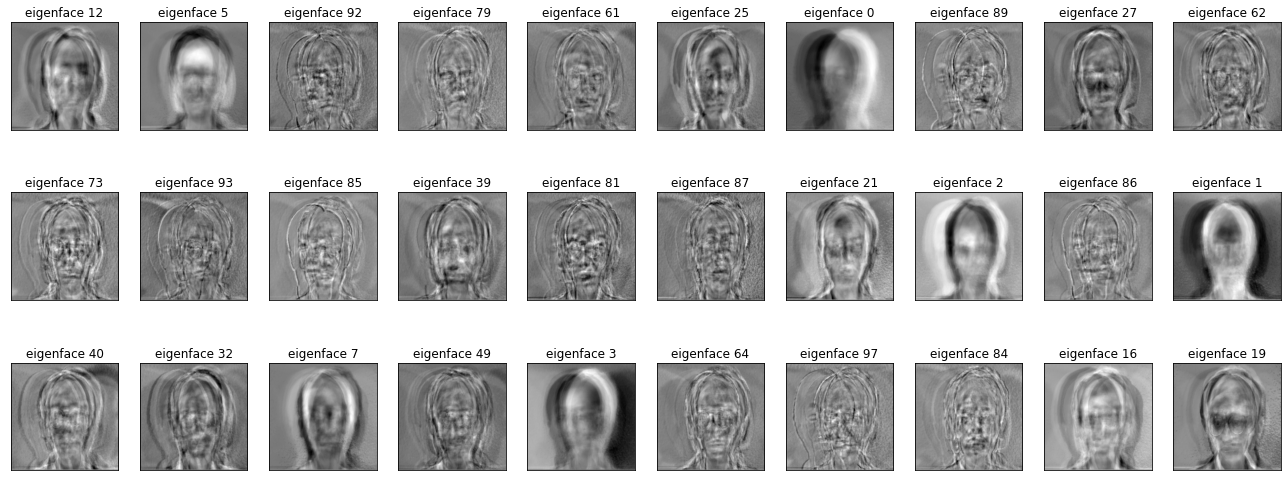

In [96]:
eigenfaces = pca.components_.reshape((n_components, 200, 200))
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles,n_row=3,n_col=10)

#### sử dụng thử viện SVC(mutilclass với phương pháp one vs one) để khớp dữ liệu từ tập train 

In [97]:
print("Thư việc SVC(one vs one method) khớp dữ liệu từ PCA train:")
param = {
         'C': [1000, 5000, 10000, 50000, 100000],
          'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],
          }
kernel='rbf'
model = GridSearchCV(SVC(kernel=kernel, class_weight='balanced'), param)
model.fit(X_train_pca, y_train)
print("Ước lượng tốt nhất cho các tham số C và gamma: ",end='')
print(model.best_estimator_)

Thư việc SVC(one vs one method) khớp dữ liệu từ PCA train:
Ước lượng tốt nhất cho các tham số C và gamma: SVC(C=1000, class_weight='balanced', gamma=0.001)


#### Dự đoán y_predict từ X_test_pca

In [98]:
y_pred = model.predict(X_test_pca)

#### Hiển thị một số hình ảnh của tập test là lable sau khi dự doán

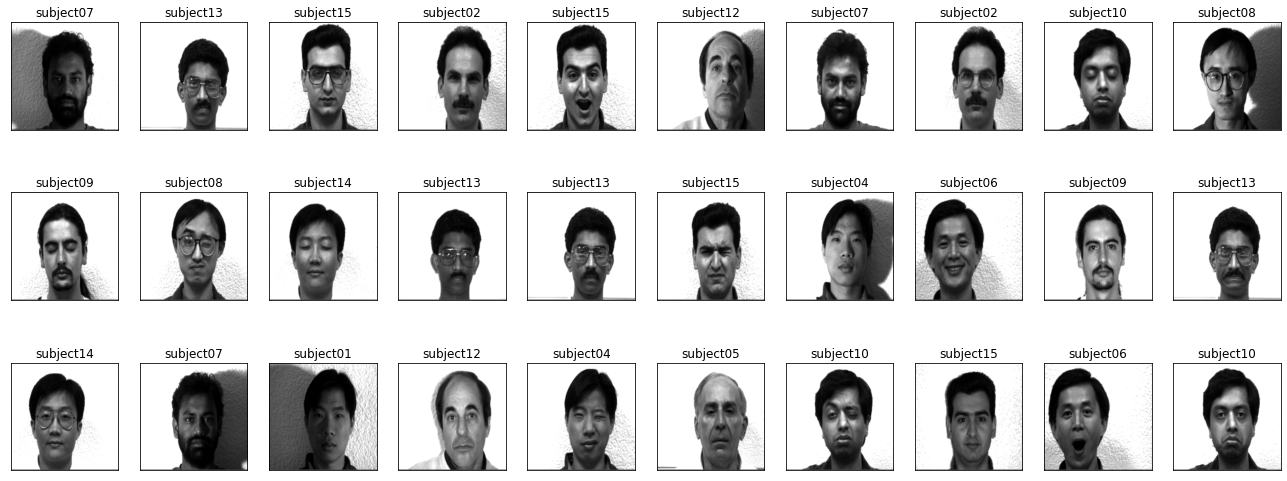

In [105]:
plot_gallery(X_test,title(y_pred,labels),n_row  = 3, n_col=10)

#### Đánh giá độ chính xác

In [100]:
#Độ chính xác của dữ liệu dự đoán so với ban đầu
acc=accuracy_score(y_test,y_pred)
print("Số ảnh dự đoán chính xác:",acc*len(y_test),"/",len(y_test))
print("Tỉ lệ dự đoán chính xác: {}%".format(acc*100))

Số ảnh dự đoán chính xác: 32.0 / 33
Tỉ lệ dự đoán chính xác: 96.96969696969697%


#### Sử dụng phương pháp One vs Rest

In [101]:
from sklearn.multiclass import OneVsRestClassifier
print("Thư việc SVC(one vs rest method) khớp dữ liệu từ PCA train:")
param = {
         'C': [1000, 5000, 10000, 50000, 100000],
          'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],
          }
kernel='rbf'
etimates = GridSearchCV(SVC(kernel=kernel, class_weight='balanced'), param)
model2=OneVsRestClassifier(etimates)
model2.fit(X_train_pca, y_train)
y_pred2 = model2.predict(X_test_pca)


Thư việc SVC(one vs rest method) khớp dữ liệu từ PCA train:


In [102]:
acc2=accuracy_score(y_test,y_pred2)
print("Số ảnh dự đoán chính xác:",acc2*len(y_test),"/",len(y_test))
print("Tỉ lệ dự đoán chính xác: {}%".format(acc2*100))

Số ảnh dự đoán chính xác: 33.0 / 33
Tỉ lệ dự đoán chính xác: 100.0%
